In [1]:
#!pip3 install tf-nightly-2.0-preview
#!pip install tensorflow==2.0.0-alpha0 

In [2]:
import tensorflow as tf
print(tf.__version__)
#tf.enable_eager_execution()
tf.executing_eagerly()
tf.test.is_gpu_available()#:with tf.device("/gpu:0"):
tf.keras.backend.clear_session()

2.0.0-dev20190317


In [3]:
#https://classroom.udacity.com/courses/ud187/lessons/e0c70c77-5584-4f83-a47b-a67a6172ae75/concepts/fe91023e-9699-418a-8f4e-58c6acad1169
tf.logging.set_verbosity(tf.logging.error)

AttributeError: module 'tensorflow' has no attribute 'logging'

In [4]:
tf.add(2,3).numpy()

5

In [5]:
#https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb
import numpy as np
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

In [22]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])  

In [23]:
model = tf.keras.models.Sequential([l0])

In [24]:
#model.compile(optimizer=tf.optimizers.Adam())
model.compile(optimizer='adam',loss='mean_squared_error')

In [25]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print(history)

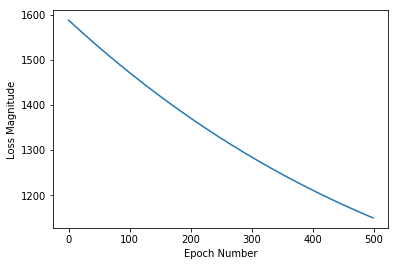

In [26]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [27]:
print(model.predict([100.0]))

[[147.19975]]


In [28]:
print(model.get_weights())

[array([[1.4670801]], dtype=float32), array([0.49174085], dtype=float32)]


In [34]:
#https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l04c01_image_classification_with_cnns.ipynb#scrollTo=xvwvpA64CaW_
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [35]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

AttributeError: module 'tensorflow.python.util.nest' has no attribute 'flatten_with_tuple_paths'

In [36]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

NameError: name 'train_dataset' is not defined

In [33]:
#!pip3 install ipyexperiments
import ipyexperiments as IPyExperimentsPytorch
ex1=IPyExperimentsPytorch

In [15]:
from tensorflow.factorization import KMeans

ModuleNotFoundError: No module named 'tensorflow.factorization'

In [6]:
import sys
import json
from ftplib import FTP
import os
import urllib.request

In [7]:
if len(sys.argv) < 2:
    print('No input parameter specified. You have to provide at least one project accession')
    sys.exit(-1)
projects = sys.argv;
# get rid of the first argument, as it is the name of the script itself
projects.pop(0)

'/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py'

In [8]:
if not os.path.exists("PRIDE_FTP_downloads"):
    os.mkdir("PRIDE_FTP_downloads") # creates a new folder in the current working directory
download_path = os.path.abspath("PRIDE_FTP_downloads") # we store the absolute path to the 

for project in projects:
        # Set the request URL
        url = 'http://www.ebi.ac.uk:80/pride/ws/archive/file/list/project/' + project
        # Create the request
        req = urllib.request.Request(url)
        # Send the request and retrieve the data
        resp = urllib.request.urlopen(req).read()
        # Interpret the JSON response
        project = json.loads(resp.decode('utf8'))
        # Get the FTP address for this project
        ftp_dir = project['list'][0]['downloadLink']
        # We need to trim the URL
        ftp_dir = ftp_dir[26:-len(project['list'][0]['fileName'])]
        print("FTP location is: " + ftp_dir)


for i in range(len(project['list'])):
                print("Downloading file: " + project['list'][i]['fileName'])
                filename = project['list'][i]['fileName']
                ftp = FTP('ftp.pride.ebi.ac.uk')
                ftp.login()
                ftp.cwd(str(ftp_dir))
                # download the file
                local_filename = os.path.join(download_path, filename)
                lf = open(local_filename, "wb")
                ftp.retrbinary("RETR " + filename, lf.write, 8*1024)
                lf.close()



HTTPError: HTTP Error 401: Unauthorized